# Overlapping Spikes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import gitInformation

In [2]:
% matplotlib inline

In [3]:
tri1 = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0])
tri1 = tri1/5.
tri2 = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 3, 4, 5, 4, 3, 2, 1, 0])
tri2 = tri2/5.
tri3 = np.array([0, 1, 2, 3, 4, 5, 4, 3,  4, 5, 4, 3, 2, 1, 0])
tri3 = tri3/5.
tri4 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 5, 4, 3,  4, 5, 6, 7, 8, 7, 6, 5, 4, 3, 2, 1, 0])
tri4 = tri4/8.

In [4]:
x = np.zeros(30)
data1 = np.append(tri1,x)
for i in range(5):
    data1 = np.append(data1,tri1)
    data1 = np.append(data1,x)

In [5]:
data2 = np.append(tri2,x)
for i in range(5):
    data2 = np.append(data2,tri2)
    data2 = np.append(data2,x)

In [6]:
data3 = np.append(tri3,x)
for i in range(5):
    data3 = np.append(data3,tri3)
    data3 = np.append(data3,x)

In [7]:
data4 = np.append(tri4,x)
for i in range(5):
    data4 = np.append(data4,tri4)
    data4 = np.append(data4,x)

In [8]:
wl = np.array([3, 5, 11, 15, 17, 21, 25, 31, 35, 39, 45, 47, 51, 55, 57, 61, 75])

In [9]:
filtered1 = np.zeros((140, len(data1)))
filtered_spikes = np.zeros((140, len(data1)))
rms = np.zeros(140)
values1 = np.zeros(len(wl))
count = -1
for w in wl:
    count += 1
    for i in range(len(filtered1)):
        data1_noised = data1 + np.random.normal(0, 0.15, len(data1))
        filtered1[i,:] = medfilt(data1_noised, w)
        filtered_spikes[i,:] = data1_noised - filtered1[i,:]
        #rms[i] = np.sqrt(np.mean(np.square(filtered1[i,:])))
        rms[i] = np.sqrt(np.mean(np.square(filtered_spikes[i,:])))
    mean = np.mean(rms)
    values1[count] = mean 

In [10]:
filtered2 = np.zeros((140, len(data2)))
filtered_spikes = np.zeros((140, len(data2)))
rms = np.zeros(140)
values2 = np.zeros(len(wl))
count = -1
for w in wl:
    count += 1
    for i in range(len(filtered2)):
        data2_noised = data2 + np.random.normal(0, 0.15, len(data2))
        filtered2[i,:] = medfilt(data2_noised, w)
        filtered_spikes[i,:] = data2_noised - filtered2[i,:]
        #rms[i] = np.sqrt(np.mean(np.square(filtered2[i,:])))
        rms[i] = np.sqrt(np.mean(np.square(filtered_spikes[i,:])))
    mean = np.mean(rms)
    values2[count] = mean 

In [11]:
filtered3 = np.zeros((140, len(data3)))
filtered_spikes = np.zeros((140, len(data3)))
rms = np.zeros(140)
values3 = np.zeros(len(wl))
count = -1
for w in wl:
    count += 1
    for i in range(len(filtered3)):
        data3_noised = data3 + np.random.normal(0, 0.15, len(data3))
        filtered3[i,:] = medfilt(data3_noised, w)
        filtered_spikes[i,:] = data3_noised - filtered3[i,:]
        #rms[i] = np.sqrt(np.mean(np.square(filtered3[i,:])))
        rms[i] = np.sqrt(np.mean(np.square(filtered_spikes[i,:])))
    mean = np.mean(rms)
    values3[count] = mean 

In [12]:
filtered4 = np.zeros((140, len(data4)))
filtered_spikes = np.zeros((140, len(data4)))
rms = np.zeros(140)
values4 = np.zeros(len(wl))
count = -1
for w in wl:
    count += 1
    for i in range(len(filtered4)):
        data4_noised = data4 + np.random.normal(0, 0.15, len(data4))
        filtered4[i,:] = medfilt(data4_noised, w)
        filtered_spikes[i,:] = data4_noised - filtered4[i,:]
        #rms[i] = np.sqrt(np.mean(np.square(filtered3[i,:])))
        rms[i] = np.sqrt(np.mean(np.square(filtered_spikes[i,:])))
    mean = np.mean(rms)
    values4[count] = mean 

In [13]:
viridis_data = np.loadtxt("viridis_data.txt")

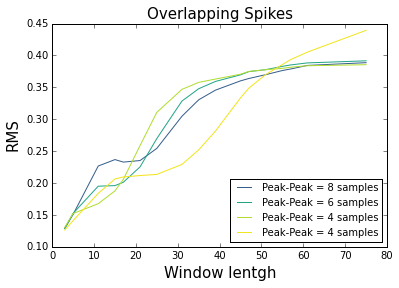

In [16]:
plt.figure()
plt.plot(wl, values1, color = viridis_data[75,:], label = 'Peak-Peak = 8 samples')
plt.plot(wl, values2, color = viridis_data[150,:], label = 'Peak-Peak = 6 samples')
plt.plot(wl, values3, color = viridis_data[225,:], label = 'Peak-Peak = 4 samples')
plt.plot(wl, values4, color = viridis_data[250,:], label = 'Peak-Peak = 4 samples')
plt.title("Overlapping Spikes", size = 15)
plt.ylabel('RMS', fontsize = 15)
plt.xlabel('Window lentgh', fontsize = 15)
plt.legend(loc='lower right',prop={'size':10})
plt.savefig('Oerlapping spikes.png', dpi = 600)